<img src="https://user.oc-static.com/upload/2020/11/23/16061367402655_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2014.05.04.png" alt="Lapage -  librairie généraliste">

**Analyse des ventes**

---
Lapage était originellement une librairie physique avec plusieurs points de vente. Devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne.

Le but est de faire le point après deux ans d’exercice et d'analyser les points forts, les points faibles, les comportements clients, etc de l'entreprise.

---
# Mise en place de l'environnement

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import os, sys
from IPython.display import display, set_matplotlib_formats
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
plt.style.use('seaborn')

import warnings 
warnings.filterwarnings("ignore")

## Constantes et configuration

In [2]:
# path to data folder
DATA_PATH = os.path.realpath('') + '/data/'

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.options.display.float_format = '{:,.2f}'.format

# seaborn config
sns.set( # Styles Seaborn
    style='whitegrid',
    context="notebook",
    palette='Paired',
    font_scale = 0.9
    )
set_matplotlib_formats('svg')

---
# Importation et nettoyage des données

Il y a 3 jeux de données :
* customers : inventaire des produits
* products : catalogue de la boutique en ligne
* transactions : ensemble des transactions de la boutique en ligne

## Fonctions

In [3]:
# import csv file
def import_csv_to_dataframe(filename):
    try:
        return pd.read_csv(DATA_PATH + filename, encoding='utf8')
    except Exception as e:
        print(">>> Le fichier {} est introuvable.".format(filename))
        sys.exit(e)
        
# calculte pourcentage
def to_pourcentage(nb_1, nb_2):
    return round(nb_1 / nb_2 * 100, 2)

def import_xls_to_dataframe(filename):
    """
    Convert xls file to pandas dataframe
        
    args
        filename: name of file with extension
    returns
        pandas dataframe
    """
    try:
        return pd.read_excel(DATA_PATH + filename, engine='openpyxl')
    except Exception as e:
        print(">>> Le fichier {} est introuvable.".format(filename))
        sys.exit(e)

def check_duplicates(dataframe):
    """
    Get dataframe duplicates count.
    
    args:
        dataframe: pandas dataframe
    """
    
    duplicate_count = len(dataframe) - len(dataframe.drop_duplicates())
    print(f"""{duplicate_count} doublons.""")

def is_primary_key(dataframe, column):
    """
    Check if values of column are primary key
    
    args:
        dataframe: pandas dataframe
        column: column name to check
    """
    if column not in dataframe.columns:
        raise ValueError("'{}' n'est pas une colonne de la dataframe".format(column))
    
    duplicate_count = len(dataframe) - len(dataframe.drop_duplicates(subset=column))
    
    if duplicate_count == 0:
        print(f"""{column} : peut être utilidée comme clé primaire.""")
    else:
        print(f"""Pas de clé primlaire : {duplicate_count} doublons.""")

## Données customers

Le fichier "customers" est un fichier contenant des informations sur les clients.

### Importation des données

In [4]:
customers = import_csv_to_dataframe("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


* client_id : numéro d'identifiant du client
* sex       : genre du client
* birth     : année de naissance du client

### Exploration

**Valeurs manquantes et types des variables :**

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


> Il n'y a donc pas de valeurs null dans les données.  
Il y a au total 8623 clients.   

**Variable "sex" :**

In [6]:
list(customers['sex'].unique())

['f', 'm']

> La variable "sex" ne possède que 2 modalités 'f' ou 'm'.

**Variable "birth" :**

In [7]:
years_list = list(customers['birth'].unique())

print(f"""
Minimum plage année : {min(years_list)}
Maximum plage année : {max(years_list)}
""")


Minimum plage année : 1929
Maximum plage année : 2004



> Les années de naissance sont comprises entre 1929 et 2004.  
> Les données "birth" sont cohérentes.

**Vérification des doublons et clé primaire :**

In [8]:
check_duplicates(customers)

0 doublons.


In [9]:
is_primary_key(customers, 'client_id')

client_id : peut être utilidée comme clé primaire.


> La variable 'client_id' n'a pas de doublon. Elle peut être utilisée comme clé primaire qui référence les différents clients.

## Données products

Le fichier "products" représente le catalogue des articles de la librairies.

### Importation des données

In [10]:
products = import_csv_to_dataframe("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


* id_prod : numéro d'identifiant de l'article
* price : prix de l'article
* categ : catégorie à laquelle fait partie l'article

### Exploration

**Valeurs manquantes et types des variables :**

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


> Il n'y a donc pas de valeurs null dans les données.  
Il y a au total 3287 articles.  

**Variable price :**

In [12]:
products.describe()

,price,categ
count,"3,287.00","3,287.00"
mean,21.86,0.37
std,29.85,0.62
min,-1.00,0.00
25%,6.99,0.00
50%,13.06,0.00
75%,22.99,1.00
max,300.00,2.00


Il existe un ou plusieurs articles qui ont un prix négatif.

In [13]:
products[products['price'] < 0]

,id_prod,price,categ
731,T_0,-1.00,0


> L'article T_0 possède un prix négatif. Il faudra supprimer cet article. Le nettoyage se fera après la jointure des tables.

**Variable categ :**

In [14]:
list_categ = list(products['categ'].unique())
list_categ

[0, 1, 2]

> La variale "categ" possède 3 modalités. Les articles sont donc classés en 3 catégories.

**Vérification des doublons et clé primaire :**

In [15]:
check_duplicates(products)
is_primary_key(products, 'id_prod')

0 doublons.
id_prod : peut être utilidée comme clé primaire.


> La variable 'client_id' n'a pas de doublons. Elle peut être utilisée comme clé primaire qui référence les différents clients.

## Données transactions

Le fichier "transactions" est un fichier contenant l'ensemble des transactions de la boutique en ligne.

### Importation des données

In [16]:
transactions = import_csv_to_dataframe("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


* id_prod : numéro d'identifiant de l'article
* date : date de la transaction
* session_id : numéro de session
* client_id : numéro d'identifiant du client

### Exploration

**Valeurs manquantes et types des variables :**

In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


> Il y a au total 679 532 transactions.  
Il n'y a pas de valeurs null dans les données.  
La variables 'date' devrait être au format datetime.

**Identifiants transactions :**

On crée une clé primaire composée de la date, de l'identifiant client et de l'identifiant de session : deux transactions peuvent survenir au même moment.

In [18]:
# add transaction id
transactions['trans_id'] = transactions['id_prod'] + transactions['date'] + transactions['session_id']

# rearrangement
transactions = transactions[[
    'trans_id',
    'id_prod',
    'date',
    'session_id',
    'client_id'
]]

**Suppression des doublons :**

In [19]:
is_primary_key(transactions, 'trans_id')

Pas de clé primlaire : 161 doublons.


In [20]:
transactions = transactions.drop_duplicates(subset='trans_id', keep="first")

In [21]:
is_primary_key(transactions, 'trans_id')

trans_id : peut être utilidée comme clé primaire.


**Vérification liste produits des transactions :**

In [22]:
list_id_prod_file = products['id_prod'].tolist()
list_id_prod_transactions = list(transactions['id_prod'].unique())

In [23]:
print(all(item in list_id_prod_file for item in list_id_prod_transactions))

False


In [24]:
new_list = list(set(list_id_prod_transactions).difference(list_id_prod_file))
print(new_list)

['0_2245']


> Une transaction concerne un produit "0_2245" qui n'est pas référencé dans le catalogue.

**Vérification liste clients des transactions :**

In [25]:
list_client_id_file = customers['client_id'].tolist()
list_client_id_transactions = list(transactions['client_id'].unique())

In [26]:
print(all(item in list_client_id_file for item in list_client_id_transactions))

True


> Toutes les transactions ont bien été faite par des clients référencés.

**Vérifications des données de dates:**

In [27]:
transactions.describe()

,trans_id,id_prod,date,session_id,client_id
count,679371,679371,679371,679371,679371
unique,679371,3267,679371,342316,8602
top,2_1412022-10-11 18:24:43.636887s_281044,1_369,2022-10-09 21:24:16.621656,s_0,c_1609
freq,1,2252,1,39,25488


> La variables date possède des valeurs abérantes préfixées par "test_".

Filtre des transactions tests :

In [28]:
filter_transactions_test = transactions["date"].str.startswith('test')
transactions_test = transactions[filter_transactions_test]

In [29]:
transactions_test.head()

,trans_id,id_prod,date,session_id,client_id
3019,T_0test_2021-03-01 02:30:02.237419s_0,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0test_2021-03-01 02:30:02.237425s_0,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0test_2021-03-01 02:30:02.237437s_0,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0test_2021-03-01 02:30:02.237436s_0,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0test_2021-03-01 02:30:02.237430s_0,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


In [30]:
transactions_test.shape

(39, 5)

> Il y a 39 transactions tests à supprimer des données.

Récupération des clients et produits test :

In [31]:
list_test_id_prod = transactions_test['id_prod'].unique()
list_test_client_id = transactions_test['client_id'].unique()
print(f"""
- id_prod test : {list_test_id_prod}
- client_id test : {list_test_client_id}
""")


- id_prod test : ['T_0']
- client_id test : ['ct_0' 'ct_1']



> Le nettoyage des transactions en supprimant les tests se fera après la jointure des tables.
On convertira ensuite les données de date au bon format datetime.

---
## Jointures des données et nettoyage

### Nettoyage des tests

**Supression des transactions tests :**

In [32]:
transactions = transactions[~transactions.date.str.startswith('test_')].reset_index()

In [33]:
transactions.shape

(679332, 6)

**Supression des clients tests :**

In [34]:
df_clients_test = customers[
    (customers['client_id'] == 'ct_0') | (customers['client_id'] == 'ct_1')]

customers = customers.drop(df_clients_test.index)

In [35]:
customers.shape

(8621, 3)

**Supression des produits tests :**

In [36]:
df_products_test = products[
    (products['id_prod'] == 'T_0')]

products = products.drop(df_products_test.index)

In [37]:
products.shape

(3286, 3)

In [38]:
products.describe()

,price,categ
count,"3,286.00","3,286.00"
mean,21.86,0.37
std,29.85,0.62
min,0.62,0.00
25%,6.99,0.00
50%,13.07,0.00
75%,22.99,1.00
max,300.00,2.00


> En supprimant ces lignes tests, il n'y a plus de valeurs négatives dans le nouveau jeu de données.

### Jointures

**Dataframe customers : Ajout de la variable âge**

In [39]:
customers['age'] = (2022 - customers['birth']).astype(int)

**Jointure des dataframe transactions et customers**

Les variables 'client_id et 'id_prod' sont des clés étrangères vers la table customers et products.

In [40]:
df_main = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
df_main.head()

,index,trans_id,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0,0_15182022-05-20 13:21:29.043970s_211425,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.00
1,1,1_2512022-02-02 07:55:19.149409s_158752,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.00
2,2,0_12772022-06-18 15:44:33.155329s_225667,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.00
3,3,2_2092021-06-24 04:19:29.835891s_52962,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.00
4,4,0_15092023-01-11 08:22:08.194479s_325227,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.00


In [41]:
df_main.shape

(679332, 11)

La jointure est bonne. Nous avons 679 332 entries.

### Conversion des dates

In [42]:
df_main['date'] = pd.to_datetime(df_main['date'], format='%Y-%m-%d')
df_main['year_month'] = df_main['date'].dt.strftime('%Y-%m')
df_main['month'] = df_main['date'].dt.strftime('%b')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       679332 non-null  int64         
 1   trans_id    679332 non-null  object        
 2   id_prod     679332 non-null  object        
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
 9   price       679111 non-null  float64       
 10  categ       679111 non-null  float64       
 11  year_month  679332 non-null  object        
 12  month       679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 72.6+ MB


**Données manquantes :**

Des transactions concernnent un produit "0_2245" qui n'est pas référencé dans le catalogue.  
On ne connait pas sa catégorie et son prix.

In [43]:
search = df_main[df_main['id_prod'] == '0_2245']
search.head()

,index,trans_id,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year_month,month
2633,2633,0_22452022-09-23 07:22:38.636773s_272266,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,NaN,NaN,2022-09,Sep
10103,10106,0_22452022-07-23 09:24:14.133889s_242482,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,NaN,NaN,2022-07,Jul
11723,11727,0_22452022-12-03 03:26:35.696673s_306338,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,NaN,NaN,2022-12,Dec
15670,15675,0_22452021-08-16 11:33:25.481411s_76493,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,NaN,NaN,2021-08,Aug
16372,16377,0_22452022-07-16 05:53:01.627491s_239078,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,NaN,NaN,2022-07,Jul


**Proportion de données :**

In [44]:
to_pourcentage(len(search),len(df_main))

0.03

> Ces transactions représentent 0.03% de la totalités des transactions.  
On peut les supprimer sans que cela n'affecte l'analyse.

In [45]:
df_main.drop(df_main[df_main.id_prod == '0_2245'].index, inplace=True)

In [46]:
df_main.shape

(679111, 13)

### Plage de dates couvertes

In [47]:
transac_date_min = df_main['date'].min().strftime("%d-%m-%Y")
transac_date_max = df_main['date'].max().strftime("%d-%m-%Y")

print(f"""
- Début des transactions : {transac_date_min}
- Fin des transactions   : {transac_date_max}
""")


- Début des transactions : 01-03-2021
- Fin des transactions   : 28-02-2023



Pour vérifier, on crée un histogramme des ventes par catégories dans le temps.

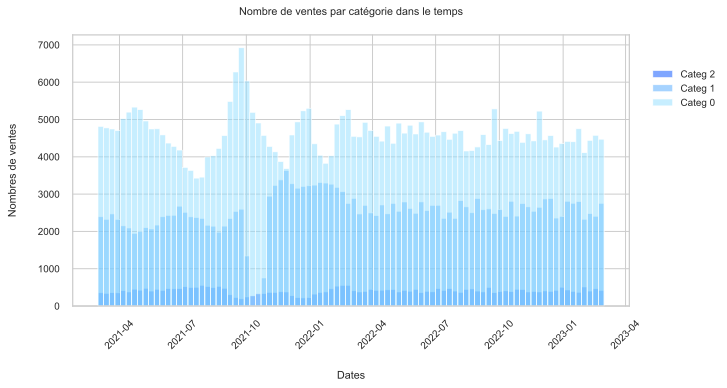

In [48]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
histo = sns.histplot(data=df_main, x='date', hue='categ', palette=["#91DFFF", "#4FA9FF", "#004FFF"])
plt.legend(labels=["Categ 2", "Categ 1", "Categ 0"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
histo.set(xlabel='Dates', ylabel='Nombres de ventes')
histo.yaxis.labelpad = 20
histo.xaxis.labelpad = 20
plt.xticks(rotation=45)
plt.title('Nombre de ventes par catégorie dans le temps', pad=20)
plt.show()

> Il manque des données pour la catégorie 1 pour le mois d'otobre 2021.

**Proportion de données concernées :**

In [49]:
df_oct = df_main[(df_main['date'] > '2021-09-30') & (df_main['date'] < '2021-11-01')]

In [50]:
df_oct['day'] = df_main['date'].dt.strftime('%d')
df_oct = df_oct.sort_values(by='day')

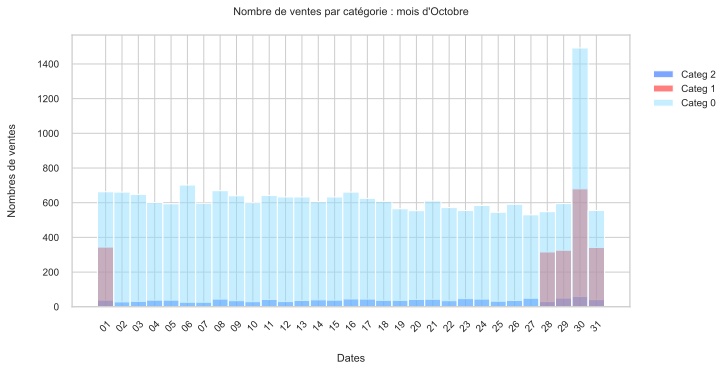

In [51]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
histo = sns.histplot(data=df_oct, x='day', hue='categ', palette=["#91DFFF", "red", "#004FFF"])
plt.legend(labels=["Categ 2", "Categ 1", "Categ 0"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
histo.set(xlabel='Dates', ylabel='Nombres de ventes')
histo.yaxis.labelpad = 20
histo.xaxis.labelpad = 20
plt.xticks(rotation=45)
plt.title("Nombre de ventes par catégorie : mois d'Octobre", pad=20)
plt.show()

> La plage de donnée manquante pour la catégorie 1 s'étend du 02 au 27 octobre 2021.

In [52]:
df_miss_data = df_main[(df_main['date'] > '2021-09-30') & (df_main['date'] < '2021-11-01')]

In [53]:
to_pourcentage(len(df_miss_data),len(df_main))

3.37

> La proportion des données du mois d'octobre représente 3.37% du dataset.  

> Cette absence de données peut être due à un porblème de stock ou un problème de site internet.  
Pour éviter un biais dans l'analyse, on peut supprimer cette partie sans que cela n'affecte notre étude.

**Suppression des données d'octobre 2021 :**

In [54]:
df_main = df_main.drop(df_miss_data.index)

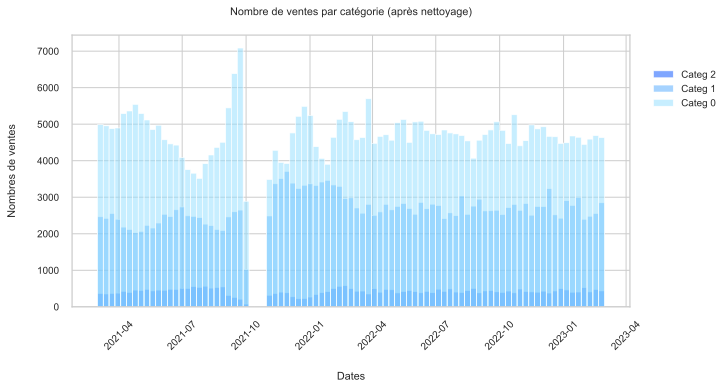

In [55]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
histo = sns.histplot(data=df_main, x='date', hue='categ', palette=["#91DFFF", "#4FA9FF", "#004FFF"])
plt.legend(labels=["Categ 2", "Categ 1", "Categ 0"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
histo.set(xlabel='Dates', ylabel="Nombres de ventes")
histo.yaxis.labelpad = 20
histo.xaxis.labelpad = 20
plt.xticks(rotation=45)
plt.title("Nombre de ventes par catégorie (après nettoyage)", pad=20)
plt.show()

> Nous travaillerons donc sur 23 mois au lieu de 24.

---
# Analyse de données (demandes de Antoine)

## Chiffre d'affaires

On ajoute les années fiscales pour les analyses.

In [56]:
df_main['fiscal_year'] = 2021
df_main['fiscal_year'].loc[df_main[df_main['date'] >= '2022-03-01'].index] = 2022

**Evolution globale :**

In [57]:
df_by_year_month = df_main.groupby('year_month').agg(
    total_sales=('year_month', 'count'), revenue=('price', 'sum')
    ).reset_index()

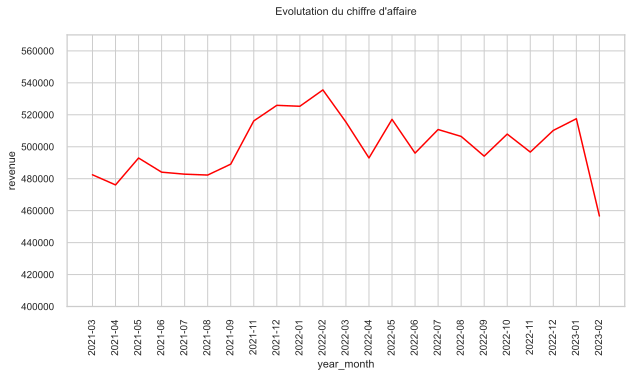

In [58]:
plt.figure(figsize=(10,5))
lineplot = sns.lineplot(x="year_month", y="revenue", color='red',
                        data=df_by_year_month).set(ylim=(400000, 570000))
plt.xticks(rotation=90)
plt.title("Evolutation du chiffre d'affaire", pad=20)
plt.show()

**Evolutation par année fiscale :**

In [59]:
list_fiscal_years = list(df_main['fiscal_year'].unique())
list_fiscal_years.sort()

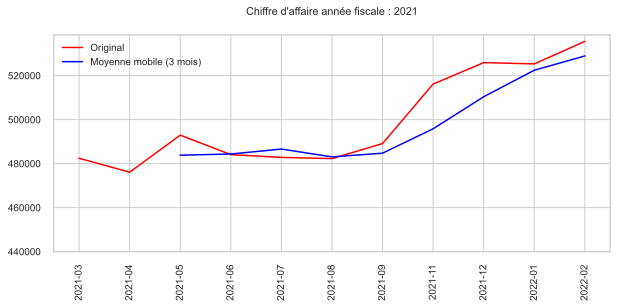

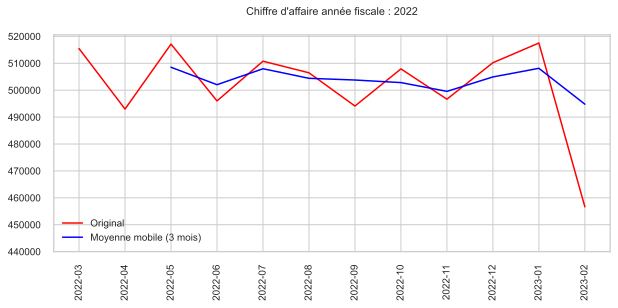

In [60]:
for fiscal_year in list_fiscal_years:
    
    df_temp = df_main[df_main['fiscal_year'] == fiscal_year]
    df_temp = df_temp.groupby('year_month').agg(
        total_sales=('year_month', 'count'), revenue=('price', 'sum')).reset_index()
    df_temp = df_temp[['year_month', 'revenue']].set_index('year_month')
    rolling_mean = df_temp.rolling(window = 3).mean()

    plt.figure(figsize=(10,4))
    plt.plot(df_temp, color = 'red', label = 'Original')
    plt.plot(rolling_mean, color = 'blue', label = 'Moyenne mobile (3 mois)')
    plt.xticks(rotation=90)
    plt.ylim(440000,)
    plt.legend(loc = 'best')
    plt.title("Moyenne mobiles chiffre d'affaire")
    plt.title("Chiffre d'affaire année fiscale : %i" % fiscal_year, pad=20)
    plt.show()

> - Année fiscal 2021 : Le chiffre d'affaire a augmenté au cours de l'année. On observe une tendance haussière.  
> - Année fiscale 2022 : Le chiffre d'affaire est globalement constant durant l'année 2022. On ne retrouve pas la même tendance haussière de 2021.

> Attention : On note une chute du chiffre d'affaire pour le mois de février 2023.

In [61]:
df_ca = df_main.groupby('fiscal_year').sum().reset_index()

# chiffre d'affaire année fiscale 2021
df_ca_2021 = df_ca[(df_ca['fiscal_year'] == 2021)]
ca_2021 = df_ca.iloc[0]['price']

# chiffre d'affaire année fiscale 2021
df_ca_2022 = df_ca[(df_ca['fiscal_year'] == 2022)]
ca_2022 = df_ca_2022.iloc[0]['price']

# difference chiffre d'affaire
diff_ca = ca_2022 - ca_2021

# evolution
evo_ca = round(( diff_ca / ca_2021) * 100 ,2)

In [62]:
print(f"""
Chiffre d'affaire année 2021 : {ca_2021:.0f}
Chiffre d'affaire année 2022 : {ca_2022:.0f}

Différence de chiffre d'affaire : {diff_ca:.0f} ({evo_ca}%)
""")


Chiffre d'affaire année 2021 : 5492810
Chiffre d'affaire année 2022 : 6021992

Différence de chiffre d'affaire : 529181 (9.63%)



> Le chiffre d'affaire globale de l'année fiscale 2022 est suppérieur à celui de 2021.

**Baisse du mois de février :**

In [63]:
df_ca_2023_02 = df_main[(df_main['year_month'] == '2023-02')]
df_ca_2023_02 = df_ca_2023_02.groupby('month').sum()
ca_2023_02 = df_ca_2023_02.iloc[0]['price']

df_ca_2023_01 = df_main[(df_main['year_month'] == '2023-01')]
df_ca_2023_01 = df_ca_2023_01.groupby('month').sum()
ca_2023_01 = df_ca_2023_01.iloc[0]['price']

diff_ca = ca_2023_02 - ca_2023_01

# evolution
evo_ca = round(( diff_ca / ca_2023_02) * 100 ,2)

In [64]:
print(f"""
Chiffre d'affaire janvier 2023 : {ca_2023_01:.0f}
Chiffre d'affaire février 2023 : {ca_2023_02:.0f}

Différence de chiffre d'affaire janvier / février : 
{diff_ca:.0f}  ({evo_ca}%)
""")


Chiffre d'affaire janvier 2023 : 517541
Chiffre d'affaire février 2023 : 456680

Différence de chiffre d'affaire janvier / février : 
-60861  (-13.33%)



> Le mois de février 2023 affiche une baisse de -13.3%.  
Cela peut être lié à une baisse globale des ventes ou dans une catégorie donnée.

## Produits vendus

### Plage de prix

**Distribution des prix:**

In [65]:
price_serie = df_main['price']

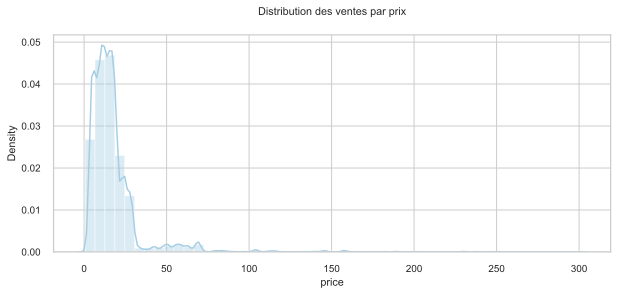

In [66]:
plt.figure(figsize=(10,4))
sns.distplot(price_serie)
plt.title("Distribution des ventes par prix", pad=20)
plt.show()

**Distribution des prix par catégorie :**

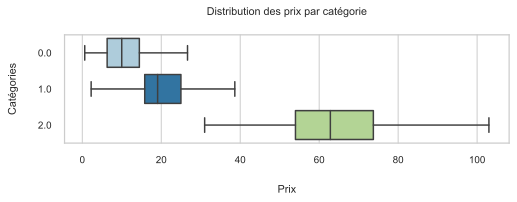

In [67]:
plt.figure(figsize=(8,2))
box_plot = sns.boxplot(data=df_main, y='categ', x='price', orient='h', showfliers=False)
plt.title('Distribution des prix par catégorie', pad=20)
box_plot.set(xlabel='Prix', ylabel="Catégories")
box_plot.yaxis.labelpad = 20
box_plot.xaxis.labelpad = 20
plt.show()

In [68]:
print(f"""
Catégorie 0 :
- Mode : {df_main[df_main['categ']==0]['price'].mode().values[0]}
- Prix moyen : {round(df_main[df_main['categ']==0]['price'].mean())}
- Prix médian : {df_main[df_main['categ']==0]['price'].median()}

Catégorie 1 :
- Mode : {df_main[df_main['categ']==1]['price'].mode().values[0]}
- Prix moyen : {round(df_main[df_main['categ']==1]['price'].mean())}
- Prix médian : {df_main[df_main['categ']==1]['price'].median()}

Catégorie 2 :
- Mode : {df_main[df_main['categ']==2]['price'].mode().values[0]}
- Prix moyen : {round(df_main[df_main['categ']==2]['price'].mean())}
- Prix médian : {df_main[df_main['categ']==2]['price'].median()}
""")


Catégorie 0 :
- Mode : 4.99
- Prix moyen : 11
- Prix médian : 9.99

Catégorie 1 :
- Mode : 15.99
- Prix moyen : 20
- Prix médian : 19.08

Catégorie 2 :
- Mode : 68.99
- Prix moyen : 76
- Prix médian : 62.83



Les 3 catégories ont des plages de prix bien définies.

> Les ventes se concentrent autour de 0 à 40 eur, ce qui corresponds principalement aux valeurs des catégories 0 et 1.

### Chiffre d'affaire par catégories

In [69]:
df_by_categ = df_main.groupby([
    'categ'
    ]).agg(total_sales=('trans_id', 'count'), revenue=('price', 'sum')).reset_index()

In [70]:
df_by_categ

,categ,total_sales,revenue
0,0.00,395747,"4,210,506.19"
1,1.00,225161,"4,613,039.92"
2,2.00,35293,"2,691,255.82"


#### Répartition par catégories :

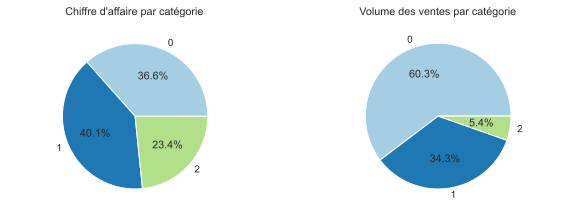

In [71]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.pie(df_by_categ.revenue, autopct='%1.1f%%', labels=list_categ)
plt.axis('equal')
plt.title("Chiffre d'affaire par catégorie", pad=20)
plt.plot()

plt.subplot(1,2,2)
plt.pie(df_by_categ.total_sales, autopct='%1.1f%%', labels=list_categ)
plt.axis('equal')
plt.title("Volume des ventes par catégorie", pad=20)
plt.plot()

plt.show()

> Les catégories 1 et 0 générent le plus de chiffre d'affaire.  
La catégorie 0 est la plus vendue, suivi de la catégorie 1.

#### Evolution du chiffre d'affaire par catégories :

In [72]:
df_categ_dict = {}

for i in list_categ :
    df_temp = df_main[df_main['categ'] == i]
    
    df_temp = df_temp.groupby(['fiscal_year', 'year_month', 'month']).agg(
        total_sales=('year_month', 'count'), revenue=('price', 'sum')
        ).reset_index()
    
    df_temp['AOV'] = df_temp['revenue'] / df_temp['total_sales']
    df_temp = df_temp.drop(df_temp[df_temp.month == 'Oct'].index)
    
    df_categ_dict[i] = df_temp

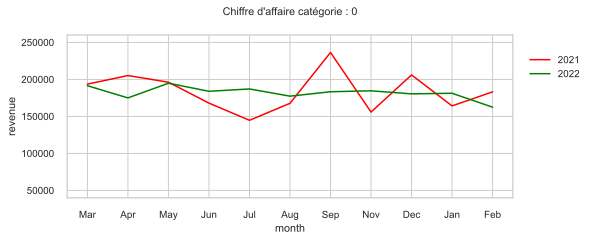

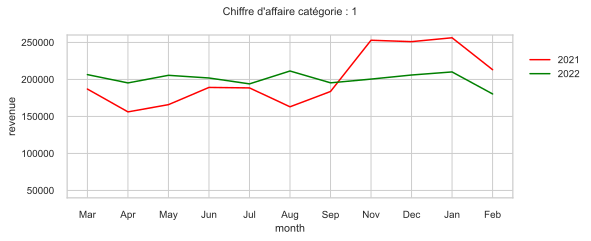

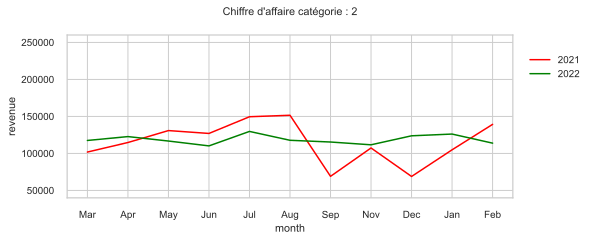

In [73]:
for categ in df_categ_dict:
    df_temp = df_categ_dict[categ]
    
    plt.figure(figsize=(8,3))
    sns.lineplot(x="month", y="revenue", data=df_temp, hue='fiscal_year', palette=["red", "green"])
    plt.ylim(40000,260000)
    plt.legend(labels=["2021", "2022"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
    plt.title("Chiffre d'affaire catégorie : %i" %categ, pad=20)
    plt.show()

> La baisse du chiffre d'affaire au mois de février est généralisée sur l'ensemble des catégories.

### Panier moyen

AOV "Average Order Value"

In [74]:
df_temp = df_main.groupby(['fiscal_year', 'year_month', 'month']).agg(
        total_sales=('year_month', 'count'), revenue=('price', 'sum')
        ).reset_index()
    
df_temp['AOV'] = df_temp['revenue'] / df_temp['total_sales']
df_temp = df_temp.drop(df_temp[df_temp.month == 'Oct'].index)

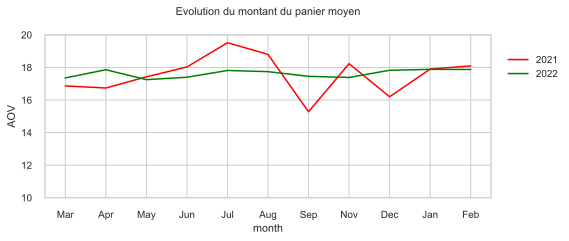

In [75]:
plt.figure(figsize=(8,3))
sns.lineplot(x="month", y="AOV", data=df_temp, hue='fiscal_year', palette=["red", "green"])
plt.legend(labels=["2021", "2022"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
plt.ylim(10,20)
plt.title("Evolution du montant du panier moyen", pad=20)
plt.show()

> Le panier moyen est plutôt contant sur l'année 2022.

### Volume de vente

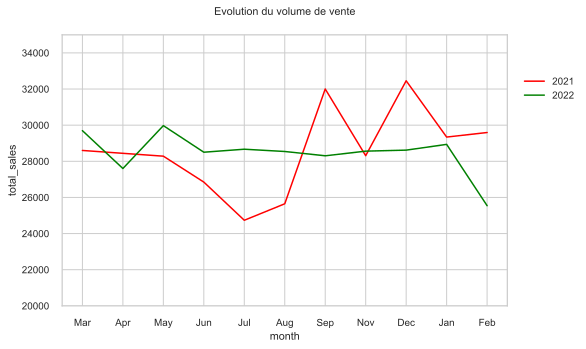

In [76]:
plt.figure(figsize=(8,5))
sns.lineplot(x="month", y="total_sales", data=df_temp, hue='fiscal_year', palette=["red", "green"])
plt.legend(labels=["2021", "2022"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1)
plt.ylim(20000,35000)
plt.title("Evolution du volume de vente", pad=20)
plt.show()

> La baisse de chiffre d'affaire du mois de février 2023 est une résultante de la baisse globale des volumes de ventes pour ce mois.

### Classement des produits

In [77]:
df_by_product = df_main.groupby(['id_prod']).agg(total_sales=('trans_id', 'count'), revenue=('price', 'sum')).reset_index()

#### Produits les plus vendus

**Par nombre de ventes :**

In [78]:
df_by_product.sort_values(['total_sales'], ascending=False).head(10)

,id_prod,total_sales,revenue
2589,1_369,2234,"53,593.66"
2642,1_417,2169,"45,527.31"
2639,1_414,2161,"51,496.63"
2731,1_498,2117,"49,474.29"
2651,1_425,2079,"35,322.21"
2627,1_403,1948,"35,044.52"
2637,1_412,1936,"32,234.40"
2638,1_413,1929,"34,702.71"
2630,1_406,1927,"47,808.87"
2631,1_407,1920,"30,700.80"


**Par chiffre d'affaires :**

In [79]:
df_by_product.sort_values(['revenue'], ascending=False).head(10)

,id_prod,total_sales,revenue
3094,2_159,632,"92,265.68"
3068,2_135,977,"67,403.23"
3043,2_112,929,"62,772.53"
3032,2_102,997,"58,962.58"
3150,2_209,790,"55,292.10"
2617,1_395,1858,"53,863.42"
2589,1_369,2234,"53,593.66"
3041,2_110,833,"51,854.25"
2639,1_414,2161,"51,496.63"
3199,2_39,881,"51,089.19"


> Les références les plus vendues appartiennent à la catégorie 1.  
Les références qui générent le plus de chiffre d'affaire appartiennent à la catégorie 2. 

**Répartition des ventes des produits :**

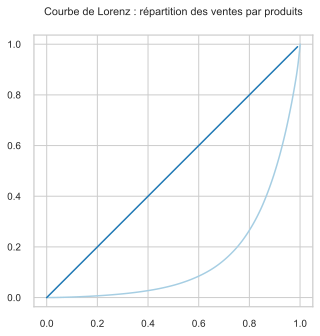

In [80]:
rev = df_by_product['total_sales'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.title("Courbe de Lorenz : répartition des ventes par produits", pad=20)

plt.show()

In [81]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
print('Incide de Gini :', gini)

Incide de Gini : 0.6948877701307428


> 80% des ventes sont réalisées sur plus de 25% des produits.   
> Il faut faire attention à ne pas être en rupture de stock sur ces produits.

#### Produits les moins vendus

**Par nombre de ventes :**

In [82]:
df_by_product.sort_values(['total_sales']).head(10)

,id_prod,total_sales,revenue
257,0_1233,1,21.99
588,0_1533,1,27.99
3173,2_23,1,115.99
594,0_1539,1,0.99
801,0_1728,1,2.27
2077,0_807,1,1.99
2106,0_833,1,2.99
3261,2_98,1,149.74
2164,0_886,1,21.82
656,0_1595,1,2.99


**Par chiffre d'affaire :**

In [83]:
df_by_product.sort_values(['revenue']).head(10)

,id_prod,total_sales,revenue
594,0_1539,1,0.99
2177,0_898,1,1.27
313,0_1284,1,1.38
1895,0_643,2,1.98
718,0_1653,2,1.98
2077,0_807,1,1.99
1782,0_541,1,1.99
664,0_1601,1,1.99
801,0_1728,1,2.27
1542,0_324,2,2.36


> Les références les moins vendues et qui générent le moins de chiffre d'affaire font partie de la catégorie 0.

## Profils clients

### Catégorisation des clients

On cherche à déterminer si il y a des clients qui se détachent des autres.

In [84]:
df_by_client = df_main.groupby('client_id').agg(total_sales=('date', 'count'), revenue=('price', 'sum')).reset_index()

In [85]:
df_by_client.describe()

,total_sales,revenue
count,"8,598.00","8,598.00"
mean,76.32,"1,339.24"
std,300.31,"5,026.55"
min,1.00,8.30
25%,26.00,533.18
50%,50.00,998.42
75%,92.00,"1,729.13"
max,"24,427.00","312,247.61"


> Les écarts pour le nombre de ventes maximum et le revenu maximum avec leurs moyennes respectives sont trés importantes.  
Cela peut supposer qu'il y a plusieurs types de clients.

#### Courbe de Lorenz et indice de Gini

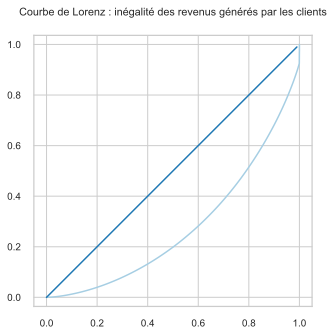

In [86]:
rev = df_by_client['revenue'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.title("Courbe de Lorenz : inégalité des revenus générés par les clients", pad=20)

plt.show()

In [87]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
print('Incide de Gini :', gini)

Incide de Gini : 0.4473865338869849


> L'indice de Gini permet de mesurer l'inégalité des chiffres d'affaires générés par les clients.

> 80% des clients génèrent 50% du chiffre d'affaire.

#### Distribution des chiffres d'affaires

In [88]:
revenue_serie = df_by_client['revenue']

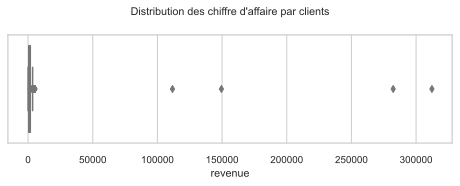

In [89]:
plt.figure(figsize=(8,2))
sns.boxplot(revenue_serie)
plt.title("Distribution des chiffre d'affaire par clients", pad=20)
plt.show()

In [90]:
df_by_client = df_by_client.sort_values(by='revenue', ascending=False).reset_index()
df_by_client.head(10)

,index,client_id,total_sales,revenue
0,677,c_1609,24427,"312,247.61"
1,4387,c_4958,5085,"282,289.70"
2,6336,c_6714,8875,"149,484.49"
3,2723,c_3454,6623,"111,638.84"
4,2108,c_2899,105,"5,214.05"
5,634,c_1570,356,"5,136.14"
6,2513,c_3263,392,"5,129.89"
7,7005,c_7319,365,"5,078.48"
8,7790,c_8026,367,"4,969.41"
9,4725,c_5263,96,"4,964.87"


In [91]:
outliers = df_by_client.head(4)

> Il y a 4 clients qui génèrent des chiffres d'affaires trés supérieurs aux autres. On les écarte pour ne pas impacter l'analyse sur les variables. Nous avons deux types de clients: B2B et B2C.

#### Dataframe par type de clients

**Variables type de clients :**

In [92]:
df_main['market'] = 'B2C'
df_main['market'].loc[df_main[df_main['client_id'].isin(outliers['client_id'])].index] = 'B2B'

**Dataframes :**

In [93]:
df_b2c = df_main[df_main['market'] =='B2C']
df_b2b = df_main[df_main['market'] =='B2B']

In [94]:
df_b2c.head()

,index,trans_id,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year_month,month,fiscal_year,market
0,0,0_15182022-05-20 13:21:29.043970s_211425,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.00,2022-05,May,2022,B2C
1,1,1_2512022-02-02 07:55:19.149409s_158752,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.00,2022-02,Feb,2021,B2C
3,3,2_2092021-06-24 04:19:29.835891s_52962,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.00,2021-06,Jun,2021,B2C
4,4,0_15092023-01-11 08:22:08.194479s_325227,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.00,2023-01,Jan,2022,B2C
5,5,0_14182022-10-20 15:59:16.084030s_285425,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,50,8.57,0.00,2022-10,Oct,2022,B2C


In [95]:
df_b2c.shape

(611191, 15)

#### Clients B2C

**Courbe de Lorenz et indice de Gini pour les clients B2C :**

In [96]:
df_b2c_by_client = df_b2c.groupby('client_id').agg(total_sales=('date', 'count'), revenue=('price', 'sum')).reset_index()

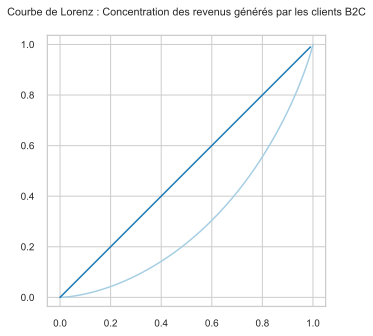

In [97]:
rev = df_b2c_by_client['revenue'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.title("Courbe de Lorenz : Concentration des revenus générés par les clients B2C", pad=20)

plt.show()

In [98]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
print('Incide de Gini :', gini)

Incide de Gini : 0.4037079570470873


> En ne regardant que les clients B2C, l'indice de Gini est plus petit.

**Distribution B2C :**

In [99]:
revenue_b2c_serie = df_b2c_by_client['revenue'].sort_values()

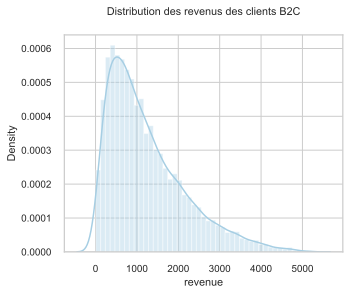

In [100]:
plt.figure(figsize=(5,4))
sns.distplot(revenue_b2c_serie)
plt.title("Distribution des revenus des clients B2C", pad=20)
plt.show()

La courbe de distribution des revenues se rapproche une courbe de distribution normale.

**Mesures statistiques :**

In [101]:
print(f"""
Moyenne  : {revenue_b2c_serie.mean()}
Médiane  : {revenue_b2c_serie.median()}
Skewness : {revenue_b2c_serie.skew()}
Kurtosis : {revenue_b2c_serie.kurtosis()}
""")


Moyenne  : 1240.3003595531718
Médiane  : 998.1750000000002
Skewness : 1.1569705168207502
Kurtosis : 1.0819647993041972



#### Clients B2B

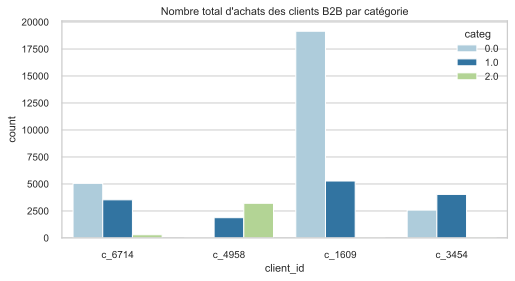

In [102]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_b2b, x='client_id', hue='categ')
plt.title("Nombre total d'achats des clients B2B par catégorie")
plt.show()

> Le client c_1609 achète un grand volume dans la catégorie 1.  
La catégorie 2 est peut représentée parmis ces clients.

### Proportion des transactions entre type de client

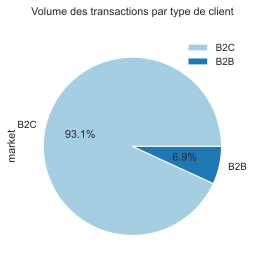

In [103]:
plt.figure(figsize=(5,5))
df_main['market'].value_counts(normalize=True).plot(kind='pie', legend=True, autopct='%1.1f%%', figsize=(4,6))
plt.title('Volume des transactions par type de client', pad=20)
plt.show()

> Les clients B2B représente 6.9% des transactions.

**Conseil marketing :**

> Il faudra avoir une attention particulière à ces clients et proposer une offre adaptadée comme la facilité de faire des commandes.

### Genre

#### Pyramide des âges

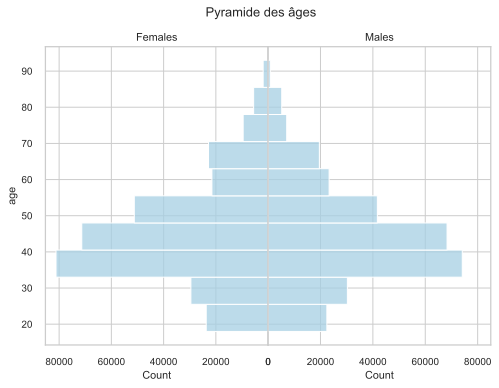

In [104]:
fig, axes = plt.subplots(1, 2)
sns.histplot(ax = axes[0], y = df_b2c[df_b2c['sex'] == 'f']['age'], bins=10)
axes[0].invert_xaxis()
axes[0].set_title('Females')
plt.xlim(0,85000)
df_main
sns.histplot(ax = axes[1], y = df_b2c[df_b2c['sex'] == 'm']['age'], bins=10)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Males')
plt.xlim(0,85000)

plt.subplots_adjust(wspace=0)
fig.suptitle('Pyramide des âges')

plt.show()

> Il n'y a pas de différence entre les àges des hommes et des femmes parmis les clients B2C.  
On note une forte représentation des clients de 30 à 55 ans.

**Conseil marketing :**

> Il faut bien veiller à communiquer avec cette tranche d'âge.

#### Chiffre d'affaire par genre

In [105]:
df_by_sex = df_b2c.groupby([
    'sex'
    ]).agg(total_sales=('trans_id', 'count'), revenue=('price', 'sum')).reset_index()

In [106]:
df_by_sex

,sex,total_sales,revenue
0,f,318295,"5,546,368.45"
1,m,292896,"5,112,772.84"


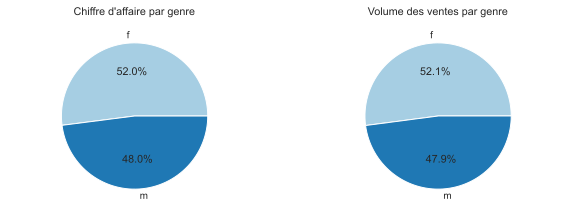

In [107]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.pie(df_by_sex.revenue, autopct='%1.1f%%', labels=['f', 'm'])
plt.axis('equal')
plt.title("Chiffre d'affaire par genre", pad=20)
plt.plot()

plt.subplot(1,2,2)
plt.pie(df_by_sex.total_sales, autopct='%1.1f%%', labels=['f', 'm'])
plt.axis('equal')
plt.title("Volume des ventes par genre", pad=20)
plt.plot()

plt.show()

> Les hommes et les femmes ont des volumes de chiffre d'affaire et d'achats simulaires.

**Conseil marketing :**

> La communication marketing doit concernée à la fois les hommes et les femmes.

---------------------------------------

# Corrélations (Demandes de Julie)

## Fonctions

In [108]:
# Pearson correlation coefficient
def get_pearsonr(data, var_a, var_b):
    X = data[var_a].values
    Y = data[var_b].values
    return st.pearsonr(X, Y)[0]

# Covariance
def get_covariance(data, var_a, var_b):
    X = data[var_a].values
    Y = data[var_b].values
    return np.cov(X, Y, ddof=0)[1,0]

# eta_squared
def get_eta_squared(data, var_a, var_b):
    x = data[var_a]   # variable qualitative
    y = data[var_b]   # variable quantitative

    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

## Genre et catégories des livres achetés

**Distribution et hypothèse :**

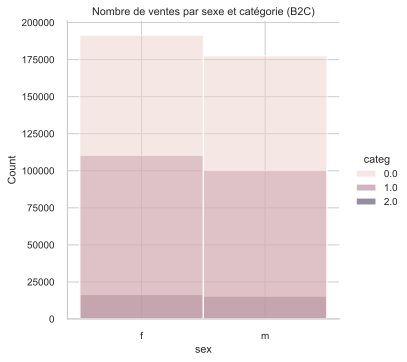

In [109]:
sns.displot(data=df_b2c, x='sex', hue='categ')
plt.title("Nombre de ventes par sexe et catégorie (B2C)")
plt.show()

Hypothèses :  
* H0 : Les catégories d'articles achétées ne dépendent pas du genre des clients.
* H1 : Les deux variables sont dépendantes.

> On étudie 2 variables qualitatives avec le test Chi-2.

**Tableau des effectifs observés :**

In [110]:
X = "sex"
Y = "categ"

cont = df_b2c[[X,Y]].pivot_table(
    index=X,
    columns=Y,
    aggfunc=len,
    margins=True,
    margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,191478,110398,16419,318295
m,177495,100056,15345,292896
Total,368973,210454,31764,611191


**Tableau des effectifs attendus :**

In [111]:
# if H0 is true :
total_x = df_main[X].value_counts()
total_y = df_main[Y].value_counts()

df_total_x = pd.DataFrame(total_x)
df_total_y = pd.DataFrame(total_y)

df_total_x.columns = ["s"]
df_total_y.columns = ["s"]

# total obervables
n = len(df_main)

# expected table
exp_df = (df_total_x.dot(df_total_y.T) / n)
exp_df

,0.00,1.00,2.00
m,"198,434.67","112,899.78","17,696.55"
f,"197,312.33","112,261.22","17,596.45"


**Tableau de contingence :**

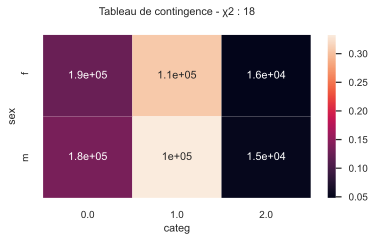

In [112]:
total_x = cont.loc[:,["Total"]]
total_y = cont.loc[["Total"],:]

n = len(df_b2c)
indep = total_x.dot(total_y) / n         # Cas d'indépendance

c = cont.fillna(0)                       # On remplace les valeurs nulles par 0
measure = (c-indep)**2 / indep           # Ecart normalisé (ξij)
xi_n = measure.sum().sum()
table = measure / xi_n

plt.figure(figsize=(6,3))
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence - χ2 : %i" %xi_n, pad=20)
plt.show()

**Chi-2 et p-value:**

In [113]:
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue
print(f"""
Chi-2 : {chi2}
pvalue : {pvalue}
""")


Chi-2 : 18.986521901965496
pvalue : 0.004186456103190957



Degré de liberté : 2  
(Nombre de lignes – 1) x (Nombre de colonnes – 1)

On applique à cette mesure un seuil de significativité de 0.05.

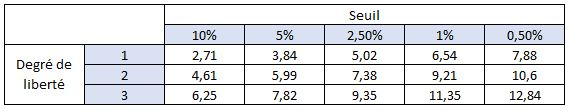

En regardant le seuil de Chi-2 qui correspond à la colonne 0,05 et à la ligne 2, on trouve la valeur 5.99 .

> La valeur du Chi-2 est élevée et suppérieur à 5.99 .  
On applique à cette mesure un seuil de significativité de 0.05. La p-value est inférieur au seuil.  
> L'hypothèse H0 est rejetée en faveur de l’hypothèse H1.  L'association entre les variables est statistiquement significative.  
Il existe donc un lien entre le sexe des clients et les catégories produits.  

**Conseil marketing :** 

> D'un point de vue marketing, il faut proposer une offre ciblée entre genre et les catégories.

## Relations avec l'âge

**Aperçu des corrélations numériques :**

In [114]:
df_correlation = df_b2c[['price', 'categ', 'age']]
df_correlation = df_correlation.corr(method='pearson')

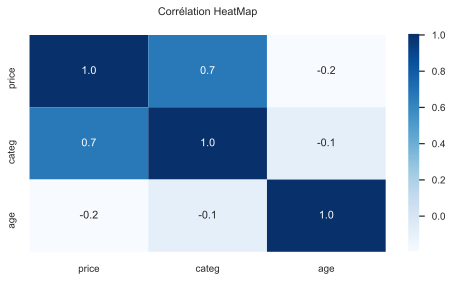

In [115]:
plt.figure(figsize=(8,4))
sns.heatmap(df_correlation, annot=True, fmt=".1f", cmap='Blues')
plt.title('Corrélation HeatMap', pad=20)
plt.show()

> Première approche des corrélations. Les catégories et les prix sont fortement corrélés.  
On va chercher d'approfondir l'analyse pour les autres variables.

**Ajout de variables pour la dataframe clients B2C :**

In [116]:
df_b2c_by_client.head()

,client_id,total_sales,revenue
0,c_1,38,550.19
1,c_10,58,"1,353.60"
2,c_100,8,254.85
3,c_1000,122,"2,209.92"
4,c_1001,95,"1,711.95"


In [117]:
# frequency calculation
nb_month = len(df_main['year_month'].unique())

df_b2c_by_client['sales_by_month'] = df_b2c_by_client['total_sales'] / nb_month
df_b2c_by_client['aov'] = df_b2c_by_client['revenue'] / df_b2c_by_client['total_sales']

In [118]:
# age range variable
df_b2c_by_client = df_b2c_by_client.merge(customers, on='client_id', how='left')
age_class = ['0-30', '31-50', '51-+']
df_b2c_by_client['age_range'] = pd.cut(x = df_b2c_by_client['age'], bins = [0,30,50,99], labels = age_class)

In [119]:
df_b2c_by_client.head()

,client_id,total_sales,revenue,sales_by_month,aov,sex,birth,age,age_range
0,c_1,38,550.19,1.65,14.48,m,1955,67,51-+
1,c_10,58,"1,353.60",2.52,23.34,m,1956,66,51-+
2,c_100,8,254.85,0.35,31.86,m,1992,30,0-30
3,c_1000,122,"2,209.92",5.30,18.11,f,1966,56,51-+
4,c_1001,95,"1,711.95",4.13,18.02,m,1982,40,31-50


### Age des clients et le montant total des achats

In [120]:
df_age_total_sales = df_b2c_by_client.groupby('age').sum().reset_index()
df_age_total_sales = df_age_total_sales[['age', 'revenue']]
df_age_total_sales.head()

,age,revenue
0,18,"591,017.02"
1,19,"172,804.76"
2,20,"178,377.92"
3,21,"174,222.15"
4,22,"160,503.38"


**Distribution et hypothèse :**

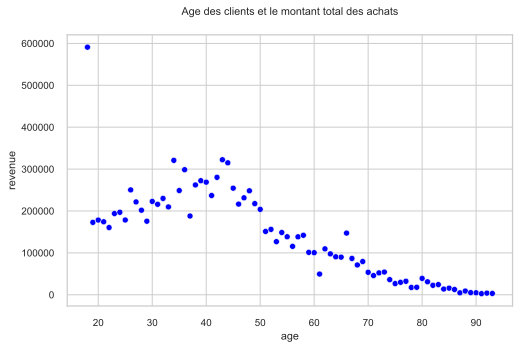

In [121]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_age_total_sales, x="age", y="revenue", color='blue')
plt.title("Age des clients et le montant total des achats", pad=20)
plt.show()

> On note un montant qui sort du lot pour les clients ayant 18 ans. Cela peut être due à des dates de naissances fausses données lors de l'inscription. En effet, les commerçant ne peuvent pas vendre en ligne des produits aux mineurs.

Hypothèses :  
* H0 : Les montants d'achats ne dépendent pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

**Analyse quantitative :**

On étudie deux variables quantitatives avec la corrélation de Pearson.

In [122]:
freq_by_age_coef_Pearson = st.pearsonr(df_age_total_sales.age, df_age_total_sales.revenue)[0]
freq_by_age_cov = np.cov(df_age_total_sales["age"],df_age_total_sales["revenue"],ddof=0)[1,0]

print(f"""
Coefficient de Pearson : {freq_by_age_coef_Pearson}
Covariance : {freq_by_age_cov}
""")


Coefficient de Pearson : -0.8312968452179571
Covariance : -1976447.9608552617



> Evolution contraire des deux variables avec une corrélation forte (proche de -1).  
Le coefficient est négatif, plus les clients sont agés plus le montant total de leur achat est faible.

**Régression linéaire :**

A partir de ces résultats, on trace la régression linéaire à l'aide des "moindres carrés".

In [123]:
X = df_age_total_sales[['age']]
Y = df_age_total_sales['revenue']

X = X.copy()
X['intercept'] = 1.
model_result = sm.OLS(Y, X).fit()               # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = model_result.params['age'], model_result.params['intercept']

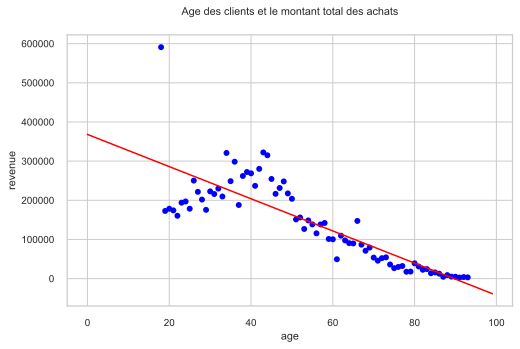

In [124]:
plt.figure(figsize=(8, 5))
plt.plot(df_age_total_sales.age, df_age_total_sales.revenue, "o", color='blue')
plt.plot(np.arange(100), [a*x+b for x in np.arange(100)], color='red')
plt.xlabel("age")
plt.ylabel("revenue")
plt.title("Age des clients et le montant total des achats", pad=20)
plt.show()

In [125]:
rsquare = model_result.rsquared
pvalue = model_result.pvalues[0]

print(f"""
r-square : {rsquare}
p-value  : {pvalue}
""")


r-square : 0.6910544448693281
p-value  : 1.4764333624612804e-20



> La value du R² permet de déterminer la qualité de la régression linéaire. Ici, elle est proche de 1. Les points sont donc peu dispersés par rapport à la courbe.  
> La p-value est faible, les résultats sont statistiquement significatifs.
> On rejette donc l'hypothèse H0.

**Conseil marketing :**

> Les clients dont l'âge est inférieur à 50 ans ont des montants d'achats plus élevés sur notre site. Il est intéressant d'étoffer notre offre pour cette tranche d'âge pour augmenter notre chiffre d'affaire.

### Age des clients et la fréquence d’achat

**Distribution et hypothèse :**

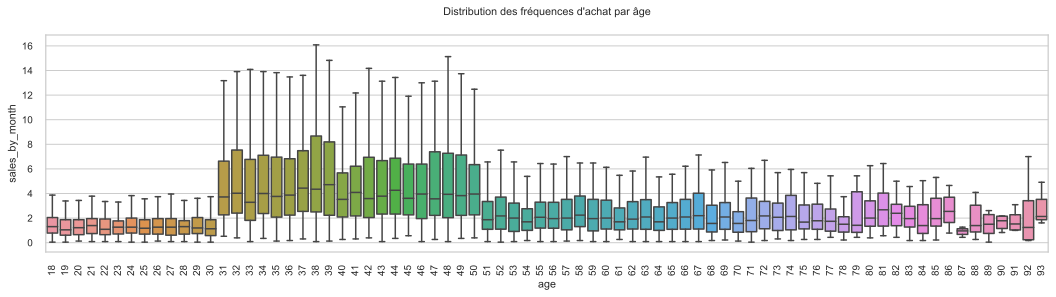

In [126]:
plt.figure(figsize=(18,4))
sns.boxplot(
    data=df_b2c_by_client,
    y='sales_by_month', x='age', showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution des fréquences d'achat par âge", pad=20)
plt.show()

In [127]:
df_trans_freq_by_age = df_b2c_by_client.groupby('age').mean().reset_index()
age_class = ['0-30', '31-50', '51-+']
df_trans_freq_by_age['age_range'] = pd.cut(x = df_trans_freq_by_age['age'], bins = [0,30,50,99], labels = age_class)
df_trans_freq_by_age.head()

,age,total_sales,revenue,sales_by_month,aov,birth,age_range
0,18,33.75,"1,352.44",1.47,40.89,"2,004.00",0-30
1,19,29.22,"1,191.76",1.27,44.68,"2,003.00",0-30
2,20,30.68,"1,230.19",1.33,40.87,"2,002.00",0-30
3,21,33.25,"1,393.78",1.45,44.96,"2,001.00",0-30
4,22,31.57,"1,180.17",1.37,38.75,"2,000.00",0-30


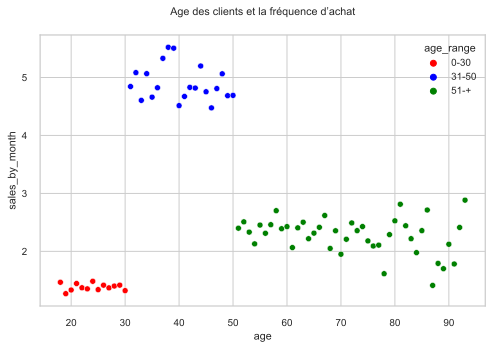

In [128]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_trans_freq_by_age, x="age", y="sales_by_month", hue='age_range', palette=['red', 'blue', 'green'])
plt.title("Age des clients et la fréquence d’achat", pad=20)
plt.show()

On observe qu'il y a 3 groupes d'individus :  
* de 0 à 30 ans
* de 31 à 50 ans
* de 51 ans à plus  

Hypothèses :  
* H0 : La fréquence d'achat ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

**Analyse quantitative : coefficient de corrélation linéaire de Pearson**

- Tout les individus :

In [129]:
print(f"""
Coefficient de Pearson : : {get_pearsonr(df_trans_freq_by_age, 'age', 'sales_by_month')}
Covariance : {get_covariance(df_trans_freq_by_age, 'age', 'sales_by_month')}
""")


Coefficient de Pearson : : -0.21510257890251916
Covariance : -6.209836382561247



> Evolution contraire des deux variables avec une corrélation faible.  

- Par tranche d'âge :

In [130]:
for class_of_age in age_class:
    
    df_trans_freq = df_trans_freq_by_age[df_trans_freq_by_age['age_range'] == class_of_age]
    
    print(f"""
    -- Tranche d'âge : {class_of_age}
    
    Coefficient de Pearson : {get_pearsonr(df_trans_freq, 'age', 'sales_by_month')}
    Covariance : {get_covariance(df_trans_freq, 'age', 'sales_by_month')}
    """)


    -- Tranche d'âge : 0-30
    
    Coefficient de Pearson : -0.0021467217227248148
    Covariance : -0.0004760141490147867
    

    -- Tranche d'âge : 31-50
    
    Coefficient de Pearson : -0.21963770809829994
    Covariance : -0.3777041161519083
    

    -- Tranche d'âge : 51-+
    
    Coefficient de Pearson : -0.27158552002718983
    Covariance : -1.0304977116579714
    


> Les corrélations dans les tranches d'âge sont faibles.

- Conclusion :

> La valeur du coefficient de Pearson montre qu'il existe une corrélation faible entre l'âge des clients et leurs fréquences d'achat. 
> Toutefois cette corrélation n'est pas homogène entre les différentes tranches d'âge. Une analyse ANOVA sera plus pertinente.

**Analyse qualitative : ANOVA**

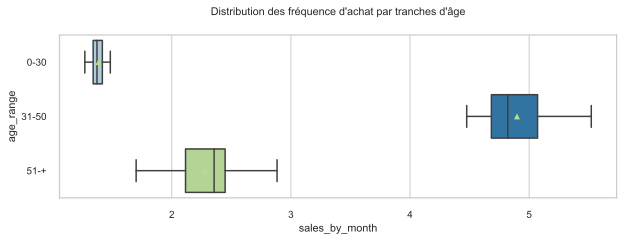

In [131]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df_trans_freq_by_age, x='sales_by_month', y='age_range', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution des fréquence d'achat par tranches d'âge", pad=20)
plt.show()

In [132]:
get_eta_squared(df_trans_freq_by_age, 'age_range', 'sales_by_month')

0.9555947619390444

La fonction f_oneway de scipy.stats permet de tester l'hypothèse nulle selon laquelle deux groupes ou plus ont la même moyenne de population.

In [133]:
st.f_oneway(df_trans_freq_by_age[df_trans_freq_by_age.age_range == '0-30'].sales_by_month,
            df_trans_freq_by_age[df_trans_freq_by_age.age_range == '31-50'].sales_by_month,
            df_trans_freq_by_age[df_trans_freq_by_age.age_range == '51-+'].sales_by_month
           )

F_onewayResult(statistic=785.475100097336, pvalue=4.279060221161277e-50)

> La value eta2 est proche de 1. Les moyennes par classes sont très différentes.  
La pvalue est inférieure à 0.05 ce qui rend le test significatif.

> Il existe donc une relation entre les tranches d'âges et les fréquences d'achat. On rejette l'hypothèse H0.

**Conseil marketing :**

Il est important d'avoir une stratégie de relance ou promotionnelle pour la tranche d'âge 31-50 ans, en passant notamment par des newsletters ou un programme de fidélisation.  
- Les moins de 30 ans achètent 1 livre par mois.  
- Les 30 à 50 ans achètent 5 livres par mois.  
- Les plus de 50 ans achètent de 2 à 3 livres par mois.

### Age des clients et la taille du panier moyen

In [134]:
df_clients_aov_size = df_b2c.groupby(['session_id', 'age']).count().reset_index()
df_clients_aov_size = df_clients_aov_size.groupby('age').mean().reset_index()
df_clients_aov_size = df_clients_aov_size[['age', 'id_prod']]
df_clients_aov_size = df_clients_aov_size.rename(columns = {'id_prod':'nb_prod'})

In [135]:
# add a-range variable
age_class = ['0-30', '31-50', '51-+']
df_clients_aov_size['age_range'] = pd.cut(x = df_clients_aov_size['age'], bins = [0,30,50,99], labels = age_class)

In [136]:
df_clients_aov_size.head()

,age,nb_prod,age_range
0,18,1.77,0-30
1,19,1.71,0-30
2,20,1.76,0-30
3,21,1.76,0-30
4,22,1.82,0-30


**Distribution et hypothèse :**

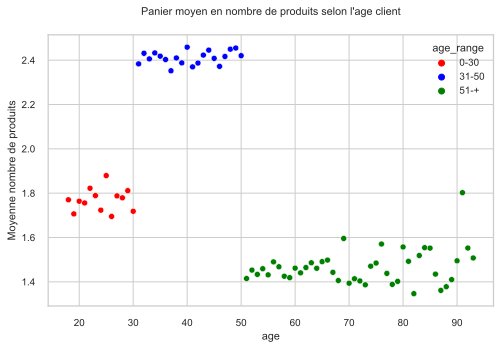

In [137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clients_aov_size, x="age", y="nb_prod", color='blue', hue='age_range', palette=['red', 'blue', 'green'])
plt.title("Panier moyen en nombre de produits selon l'age client", pad=20)
plt.ylabel('Moyenne nombre de produits')

plt.show()

On observe aussi qu'il y a 3 groupes d'individus :  
* de 0 à 30 ans
* de 31 à 50 ans
* de 51 ans à plus 

Hypothèses :  
* H0 : La taille du panier moyen ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

**Coefficient de corrélation linéaire de Pearson :**

In [138]:
print(f"""
Coefficient de Pearson : : {get_pearsonr(df_clients_aov_size, 'age', 'nb_prod')}
Covariance : {get_covariance(df_clients_aov_size, 'age', 'nb_prod')}
""")


Coefficient de Pearson : : -0.5856650002846514
Covariance : -5.210620997491897



> La valeur du coefficient de Pearson montre que la corrélation entre l'âge des clients et le montant du panier moyen est faible. Une analyse ANOVA sera plus pertinente.

**Analyse qualitative : ANOVA**

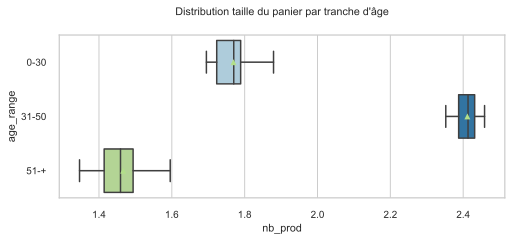

In [139]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df_clients_aov_size, x='nb_prod', y='age_range', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution taille du panier par tranche d'âge", pad=20)
plt.show()

In [140]:
get_eta_squared(df_clients_aov_size, 'age_range', 'nb_prod')

0.9752538433602355

In [141]:
st.f_oneway(df_clients_aov_size[df_clients_aov_size.age_range == '0-30'].nb_prod,
            df_clients_aov_size[df_clients_aov_size.age_range == '31-50'].nb_prod,
            df_clients_aov_size[df_clients_aov_size.age_range == '51-+'].nb_prod
           )

F_onewayResult(statistic=1438.476519842619, pvalue=2.3069232882538724e-59)

> La value eta2 est proche de 1. Il existe une corrélation forte entre les tranches d'âges et la taille du panier moyen.

**Conseil marketing :**

Les clients de 31 à 50ans passent de plus grosses commandes. Nous pouvons leurs faire des recommandations pendant leurs sessions en fonction de leurs paniers.

### Age des clients et le montant du panier moyen

In [142]:
df_b2c_by_client.head()

,client_id,total_sales,revenue,sales_by_month,aov,sex,birth,age,age_range
0,c_1,38,550.19,1.65,14.48,m,1955,67,51-+
1,c_10,58,"1,353.60",2.52,23.34,m,1956,66,51-+
2,c_100,8,254.85,0.35,31.86,m,1992,30,0-30
3,c_1000,122,"2,209.92",5.30,18.11,f,1966,56,51-+
4,c_1001,95,"1,711.95",4.13,18.02,m,1982,40,31-50


In [143]:
df_clients_aov = df_b2c_by_client.groupby('age').mean().reset_index()
df_clients_aov = df_clients_aov[['age', 'aov']]

In [144]:
# add a-range variable
age_class = ['0-30', '31-50', '51-+']
df_clients_aov['age_range'] = pd.cut(x = df_clients_aov['age'], bins = [0,30,50,99], labels = age_class)

In [145]:
df_clients_aov.head()

,age,aov,age_range
0,18,40.89,0-30
1,19,44.68,0-30
2,20,40.87,0-30
3,21,44.96,0-30
4,22,38.75,0-30


**Distribution et hypothèse :**

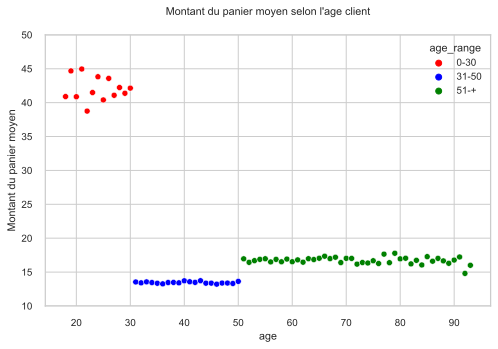

In [146]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clients_aov, x="age", y="aov", color='blue', hue='age_range', palette=['red', 'blue', 'green'])
plt.title("Montant du panier moyen selon l'age client", pad=20)
plt.ylabel('Montant du panier moyen')
plt.ylim(10,50)

plt.show()

Hypothèses :  
* H0 : Le montant du panier moyen ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

**Analyse qualitative : ANOVA**

In [147]:
get_eta_squared(df_clients_aov, 'age_range', 'aov')

0.9935267528407402

In [148]:
st.f_oneway(df_clients_aov[df_clients_aov.age_range == '0-30'].aov,
            df_clients_aov[df_clients_aov.age_range == '31-50'].aov,
            df_clients_aov[df_clients_aov.age_range == '51-+'].aov
           )

F_onewayResult(statistic=5602.092054651142, pvalue=1.276320996050062e-80)

> La value eta2 est proche de 1. Il existe une corrélation forte entre les tranches d'âges et le montant du panier moyen.
> On rejette l'hypothèse H0.

**Conseil marketing :**

Les clients de 31 à 50 ans passent de plus grosses commandes avec des montants d'articles bas. Le montant de leurs achats restent en effet plus bas que les autres tranches d'âges. Les produits que leur propose doivent avoir des prix peu élevés.

### Age des clients et les catégories des livres achetés

In [149]:
df_by_age = df_b2c.groupby(['age', 'categ']).count().reset_index()
df_by_age = df_by_age[['age', 'categ', 'trans_id']]
df_by_age = df_by_age.rename(columns = {'trans_id':'nb_prod'})

In [150]:
age_class = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-+']
df_by_age['age_range'] = pd.cut(x = df_by_age['age'], bins = [0,20,30,40,50,60,70,80,90], labels = age_class)

In [151]:
df_by_age.head()

,age,categ,nb_prod,age_range
0,18,0.00,3276,0-20
1,18,1.00,5661,0-20
2,18,2.00,5813,0-20
3,19,0.00,850,0-20
4,19,1.00,1661,0-20


**Distribution et hypothèse :**

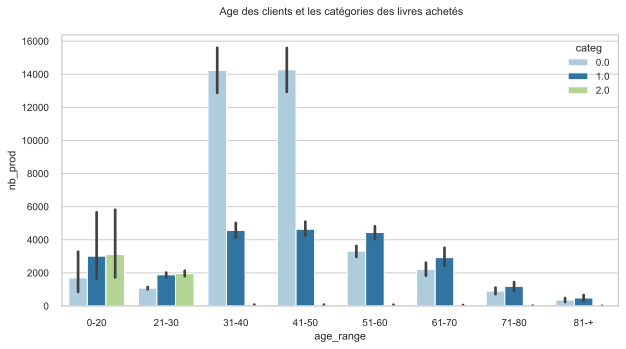

In [152]:
plt.figure(figsize=(10,5))
sns.barplot(x="age_range", y="nb_prod", hue="categ", data=df_by_age)
plt.title(' Age des clients et les catégories des livres achetés', pad=20)
plt.show()

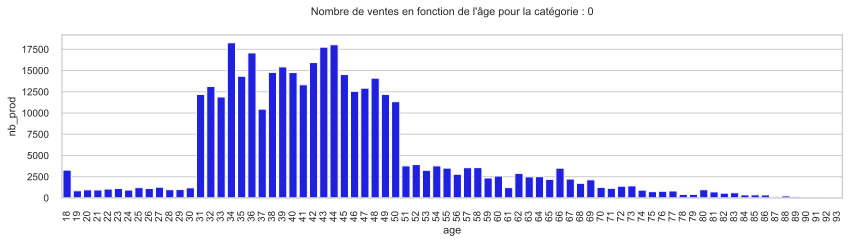

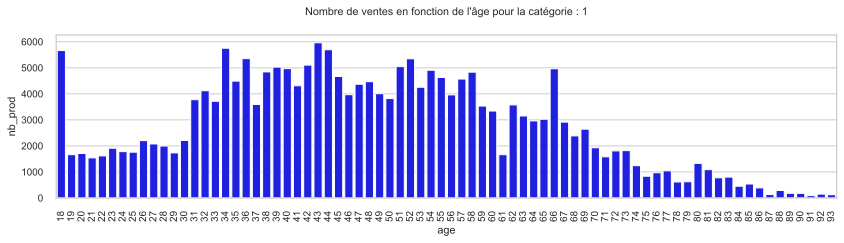

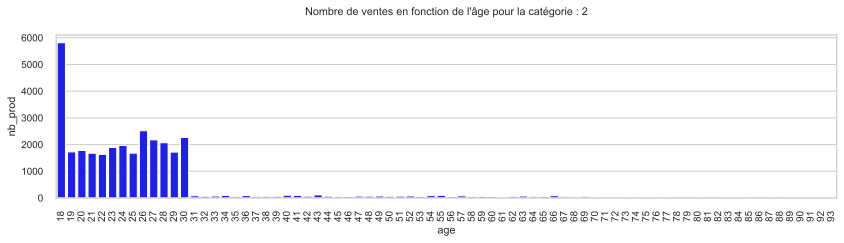

In [153]:
for categ in list_categ :
    df_temp = df_by_age[df_by_age['categ'] == categ]
    df_categ_dict[categ] = df_temp
    
    plt.figure(figsize=(14,3))
    sns.barplot(data=df_temp, x="age", y="nb_prod", color='blue')
    plt.title("Nombre de ventes en fonction de l'âge pour la catégorie : %i" % categ, pad=20)
    plt.xticks(rotation=90)
    plt.show()

- Les articles de la catégorie 0 sont trés achétés par les clients de 35 à 50 ans.  
- Les articles de la catégorie 1 sont achétés par un tranche d'àge plus grande de 35 à 60 ans.  
- Les clients de moins de 30 ans achètent principalement des articles de la catégorie 2, articles aux prix plus élevés.  

Hypothèses :  
* H0 : Les catégories achetées sont liées à l'âge des clients.
* H1 : Les deux variables sont dépendantes.

**Analyse qualitative / qualitative Chi-2 :**

In [154]:
df_sample = df_b2c.copy()
age_class = ['0-35', '31-50', '51-+']
df_sample['age_range'] = pd.cut(x = df_sample['age'], bins = [0,35,50,99], labels = age_class)

**Tableau des effectifs observés :**

In [155]:
X = "age_range"
Y = "categ"

cont = df_sample[[X,Y]].pivot_table(
    index=X,
    columns=Y,
    aggfunc=len,
    margins=True,
    margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
age_range,,,,
0-35,85680,49687,29260,164627
31-50,215217,70137,1068,286422
51-+,68076,90630,1436,160142
Total,368973,210454,31764,611191


**Tableau des effectifs attendus :**

In [156]:
# if H0 is true :

total_x = df_sample[X].value_counts()
total_y = df_sample[Y].value_counts()

df_total_x = pd.DataFrame(total_x)
df_total_y = pd.DataFrame(total_y)

df_total_x.columns = ["s"]
df_total_y.columns = ["s"]

# total obervables
n = len(df_sample)

# expected table
exp_df = (df_total_x.dot(df_total_y.T) / n)
exp_df

,0.00,1.00,2.00
31-50,"172,911.55","98,624.91","14,885.54"
0-35,"99,384.51","56,686.72","8,555.77"
51-+,"96,676.94","55,142.38","8,322.69"


**Tableau de contingence :**

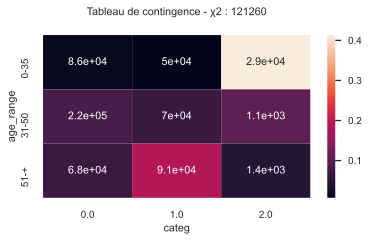

In [157]:
total_x = cont.loc[:,["Total"]]
total_y = cont.loc[["Total"],:]

n = len(df_b2c)
indep = total_x.dot(total_y) / n         # Cas d'indépendance

c = cont.fillna(0)                       # On remplace les valeurs nulles par 0
measure = (c-indep)**2 / indep           # Ecart normalisé (ξij)
xi_n = measure.sum().sum()
table = measure / xi_n

plt.figure(figsize=(6,3))
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence - χ2 : %i" %xi_n, pad=20)
plt.show()

In [158]:
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue
print(f"""
Chi-2 : {chi2}
pvalue : {pvalue}
""")


Chi-2 : 121260.42302528599
pvalue : 0.0



On applique à cette mesure un seuil de significativité de 0,05.

> La valeur du Chi-2 est élevée et suppérieur à 9,49.
On applique à cette mesure un seuil de significativité de 0,05. La p-value est inférieur au seuil.  
> L'hypothèse H0 est rejetée en faveur de l’hypothèse H1. L'association entre les variables est statistiquement significative.
Il existe donc un lien fort entre l'âge des clients et les catégories produits.

**Analyse qualitative / quantitative par ANOVA :**

In [159]:
df_by_age = df_b2c.groupby(['categ', 'age']).count().reset_index()
df_by_age = df_by_age[['categ', 'age', 'trans_id']]
df_by_age = df_by_age.rename(columns = {'trans_id':'nb_prod'})

In [160]:
age_class = ['0-35', '31-50', '51-+']
df_by_age['age_range'] = pd.cut(x = df_by_age['age'], bins = [0,35,50,99], labels = age_class)
df_by_age.head()

,categ,age,nb_prod,age_range
0,0.00,18,3276,0-35
1,0.00,19,850,0-35
2,0.00,20,960,0-35
3,0.00,21,941,0-35
4,0.00,22,1048,0-35


- Tout les individus :

In [161]:
get_eta_squared(df_by_age, 'categ', 'nb_prod')

0.20675974303894742

> La value eta2 est proche de 0. La relation entre les tranches d'âges et les catégorie par analyse ANOVA n'est pas concluante.

- Par tranche d'âge :

On essaie de faire une analyse par groupe d'âge.

In [162]:
for categ in list_categ :
    df_temp = df_by_age[df_by_age.categ == categ]
    
    print(f"""
    Catégorie {categ} :
    {get_eta_squared(df_temp, 'age_range', 'nb_prod')}
    """)


    Catégorie 0 :
    0.7049339887010901
    

    Catégorie 1 :
    0.30971078576335814
    

    Catégorie 2 :
    0.5215436503885962
    


> L'analyse par tranche d'âge montre mieux les corrélations.  
> - La catégorie 0 est fortement corrélée à l'âge des clients. Elle est surtout achété par les 31 - 50 ans.
> - La catégorie 1 est faiblement corrélée. Elle est achété par l'ensemble des clients.
> - La catégorie 2 est corrélée (graphique). Elle est principalement achété par les moins de 31 ans.

**Conseil marketing :**

Dans le cas où l'on souhaite booster les ventes d'une certaine catégorie, on pourra cibler notre campagne marketing sur les tranches d'âges correspondantes.

---

## Relation entre deux ouvrages

On cherche à connaître la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159.

pB(A) = p(A∩B) / p(B)

- Nombre de clients ayant achetés la référence 2_159 :

In [163]:
df_2_159 = df_main[(df_main['id_prod'] == '2_159')]
df_2_159 = df_2_159.groupby('client_id').count().reset_index()
customers_list_buy_2_159 = df_2_159['client_id'].unique()

card_2_159 = len(customers_list_buy_2_159)
print(card_2_159)

514


- Nombre de clients ayant achetés la référence 0_525 :

In [164]:
df_0_525 = df_main[(df_main['id_prod'] == '0_525')]
df_0_525 = df_0_525.groupby('client_id').count().reset_index()
customers_list_buy_0_525 = df_0_525['client_id'].unique()

card__0_525 = len(customers_list_buy_0_525)
print(card__0_525)

450


- Nombre de clients ayant achetés à la fois la référence 2_159 et la référence 0_525 :

In [165]:
commun_customers = set(customers_list_buy_2_159) & set(customers_list_buy_0_525)
card_2_159_N__0_525 = len(commun_customers)
print(card_2_159_N__0_525)

450


- Nombre total des clients :

In [166]:
customers_list = df_main['client_id'].unique()
card_tot = len(customers_list)
print(card_tot)

8598


**Calcul de la probabilités :**

- Probabilité qu'un client achète la référence 2_159 :

In [167]:
p_2_159 = card_2_159 / card_tot
print(p_2_159)

0.059781344498720634


- Probabilité qu'un client achète la référence 0_525 :

In [168]:
p_0_525 = card__0_525 / card_tot
print(p_0_525)

0.052337752965806


- Probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 :

Le nombre de clients ayant achetés à la fois les deux références et la référence 0_525 sont les même.  
Les probabilités sont égales : p(A∩B) = p(A)  
On a donc : pB(A) = p(A) / p(B)

In [169]:
p_0_525 / p_2_159

0.8754863813229571

> La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de 0.875, ce qui est élevé.  

**Conseil marketing :**

> Il sera interessant de proposer sur le site la référence 0_525 aux clients achetant la référence 2_159.

---
# Conclusion

**Chiffre d'affaire :**

Malgrès une augmentation du chiffre d'affaire sur l'année fiscale 2021, celui-ci reste linéaire sur 2022.  
On note un baisse pour le mois de février 2023 (-13.3%), qui est due à une baisse globale du nombre de vente. Le montant du panier moyen reste constant.

Les ventes se concentrent pour des références allant jusqu'à 40 eur. Les catégories 0 et 1 sont celles qui génèrent le plus de chiffre d'affaires. Les références qui se vendent le plus appartiennent à la catégorie 1.  
Certains produits composent principalement les ventes, puisque 25% d'entre eux composent 80% des ventes. Il faut donc apporter une attention particulière aux stocks de ces produits.

Les clients se composent en 2 typologies, les B2C et les B2B. Ces derniers réprésentant presque 7% du chiffre d'affaire globale, il serait judicieux de leurs proposer un offre adaptée comme par exemple une facilité dans la prise de commande.

**Corrélations :**

- Genre :  
Il y a bien une corrélation entre le sexe des clients et les catégories produits.

- Age :  
La plupart des corrélations montre que l'âge est un caractère qui influe sur les ventes. Celui-ci se découpe en 3 tranches:  
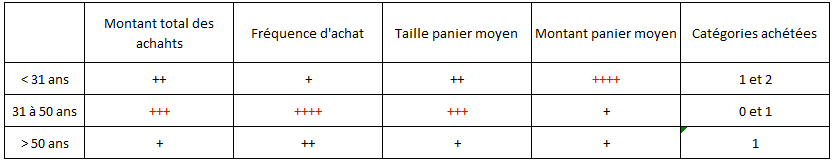  
En fonction de ces resultats, nous pouvons élaborer des stratégies marketing spécifiques en fonction de la typologie des clients cibles.

**Axe de recherches :**

Il serait interessant de comparer les chiffres entre les résultats de la vente en ligne et ceux des boutiques physiques.